**Open COCO-json**

In [2]:
import json

with open(f'E:/Peter/Scheme/datasets/18-04-247-00-ss.json', 'r+') as file:
    data = json.load(file)

**Some useful functions**

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path as osp


def get_category_annotations(ann_data, category_id):
    for ann in ann_data:
        if ann['category_id'] == category_id:
            yield ann
       
    
def get_image_by_id(images, image_id):
    for image in images:
        if image['id'] == image_id:
            return image

        
def get_category_by_id(categories, category_id):
    for cat in categories:
        if cat['id'] == category_id:
            return cat
    
    
def get_cordinates(segmentation):
    xs = list()
    ys = list()
    for i in range(len(segmentation)):
        if i % 2 == 0:
            xs.append(segmentation[i])
        else:
            ys.append(segmentation[i])
    return [int(min(ys)), int(max(ys)), int(min(xs)), int(max(xs))]
    
    
def get_category_examples_num(annotations, category_id):
    return len([a for a in annotations if a['category_id'] == category_id])


def plot_annotation(data, annotation, images_dir, cat_id):
    image_name = get_image_by_id(data['images'], annotation['image_id'])['file_name']
    image = mpimg.imread(osp.join(images_dir, image_name))
    c = get_cordinates(annotation['segmentation'][0])
    cat_name = get_category_by_id(data['categories'], cat_id)['name']
    cat_examples_num = ' - ' + str(get_category_examples_num(data['annotations'], cat_id))
    im_path = ' - ' + image_name
    plt.title(cat_name + cat_examples_num + im_path)
    plt.imshow(image[c[0]: c[1], c[2]: c[3]], cmap='gray')
    
def get_filenames_for_category(data, cat_id):
    res = list()
    anns = get_category_annotations(data['annotations'], cat_id)
    for ann in anns:
        res.append(get_image_by_id(data['images'], ann['image_id'])['path'])
    return res

def get_annotations_by_image_id(data, image_id):
    res = []
    
    for annotation in data['annotations']:
        if annotation['image_id'] == image_id:
            res.append(annotation)
            
    return res

**Get all categories list**

In [4]:
[(c['id'] ,c['name'], get_category_examples_num(data['annotations'], c['id'])) for c in data['categories']]

[(0, 'ground', 211),
 (1, 'circuit breaker', 820),
 (2, 'withdrawable circuit breaker', 142),
 (3, 'single-phase circuit breaker', 1287),
 (4, 'three-phase circuit breaker', 1491),
 (5, 'differential circuit breaker 220V', 217),
 (6, 'differential circuit breaker 380V', 74),
 (7, 'RCD 220V', 81),
 (8, 'direct connection counter', 252),
 (9, 'withdrawable circuit breaker with motor drive', 20),
 (10, 'fuse switch disconnector', 3),
 (11, 'instrument current transformer', 78),
 (12, 'reactive power compensation device', 14),
 (13, 'Inductor', 279),
 (14, 'four-phase circuit breaker', 15),
 (15, 'motorized switch', 17),
 (16, 'three-phase switch', 191),
 (17, 'switch', 824),
 (18, 'voltage monitoring relay', 6),
 (19, 'surge protection device', 61),
 (20, 'fuse', 55),
 (21, 'motorized single-phase circuit breaker', 0),
 (22, 'motorized three-phase circuit breaker', 8),
 (23, 'transformer', 23),
 (24, 'motorizwd circuit breaker', 11),
 (25, 'capasitor ', 5),
 (26, 'lamp', 162),
 (27, 'phot

**Plot category examples**

(run plot_annotation again to get the next example)

In [5]:
cat_id = 1
anns = get_category_annotations(data['annotations'], cat_id)

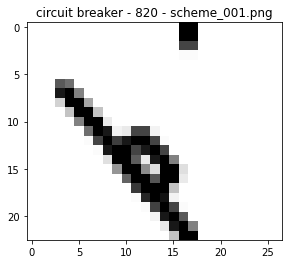

In [6]:
plot_annotation(data, next(anns), f'E:/Peter/Scheme/scheme_copy/', cat_id)

**Check images in COCO-json file**

In [4]:
[i['file_name'] for i in data['images']]

['scheme_111.png',
 'scheme_192.png',
 'scheme_193.png',
 'scheme_082.png',
 'scheme_042.png',
 'scheme_181.png',
 'scheme_171.png',
 'scheme_103.png',
 'scheme_054.png',
 'scheme_081.png',
 'scheme_104.png',
 'scheme_120.png',
 'scheme_165.png',
 'scheme_228.png',
 'scheme_133.png',
 'scheme_107.png',
 'scheme_030.png',
 'scheme_064.png',
 'scheme_004.png',
 'scheme_195.png',
 'scheme_013.png',
 'scheme_197.png',
 'scheme_118.png',
 'scheme_084.png',
 'scheme_199.png',
 'scheme_210.png',
 'scheme_219.png',
 'scheme_160.png',
 'scheme_200.png',
 'scheme_065.png',
 'scheme_177.png',
 'scheme_184.png',
 'scheme_038.png',
 'scheme_147.png',
 'scheme_164.png',
 'scheme_162.png',
 'scheme_108.png',
 'scheme_243.png']

In [31]:
for image in data['images']:
    print(len(get_annotations_by_image_id(data, image['id'])))

26
32
19
5
14
13
7
6
31
61
12
31
38
95
28
33
35
17
11
54
16
10
13
12
24
12
37
9
13
8
42
13
25
12
19
41
29
10
12
23
19
17
12
15
25
5
12
19
9
14
4
21
32
53
32
4
24
61
17
7
7
35
33
23
6
28
100
25
16
11
45
21
9
23
6
28
7
46
5
11
90
6
13
41
8
27
